# **Preprocessing**

In [1]:
!pip install -q tbats

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from tbats import TBATS
import pickle

In [3]:
df = pd.read_csv('temperature_data.csv', parse_dates=['Date'], index_col='Date')
df.head()

,Temperature
Date,
1980-01-02,275.23980
1980-01-03,275.39957
1980-01-04,275.77197
1980-01-05,276.20398
1980-01-06,276.54490


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12784 entries, 1980-01-02 to 2015-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  12784 non-null  float64
dtypes: float64(1)
memory usage: 199.8 KB


In [5]:
df.isnull().sum()

Temperature    0
dtype: int64

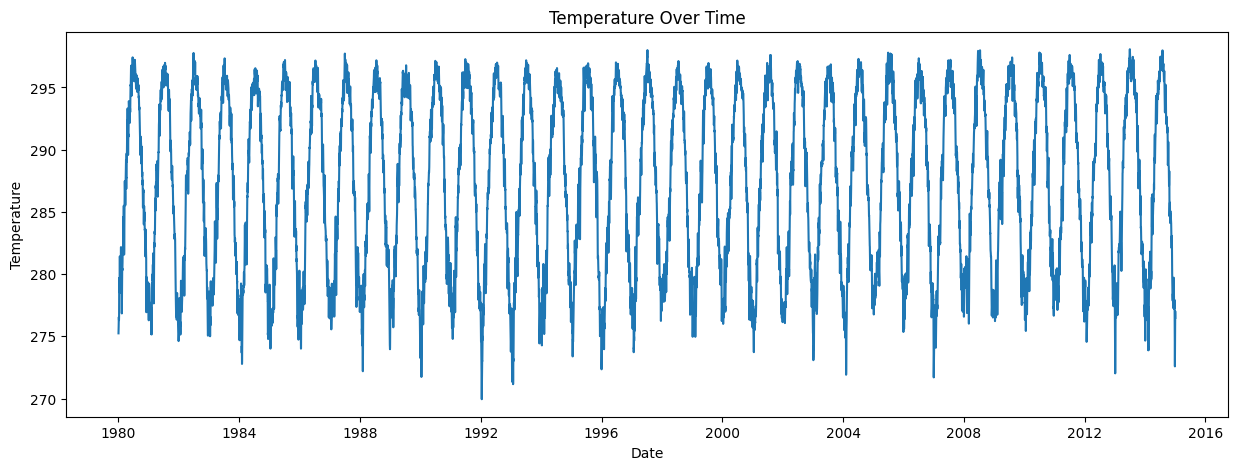

In [6]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Temperature'])
plt.title('Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.show()

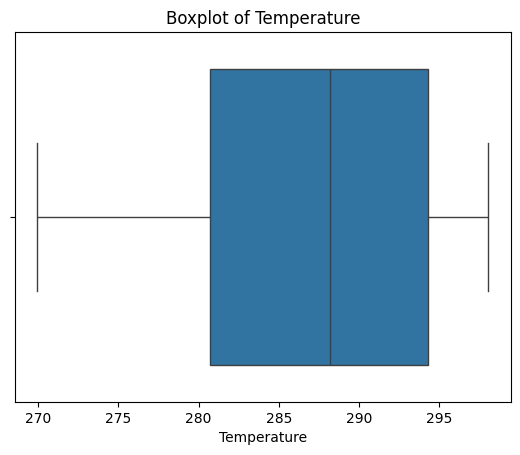

In [7]:
sns.boxplot(x=df['Temperature'])
plt.title('Boxplot of Temperature')
plt.xlabel('Temperature')
plt.show()

In [8]:
train_size = int(len(df) * 0.8)
train_data = df[:train_size]
test_data = df[train_size:]

print(train_data.head())
print(test_data.head())

            Temperature
Date                   
1980-01-02    275.23980
1980-01-03    275.39957
1980-01-04    275.77197
1980-01-05    276.20398
1980-01-06    276.54490
            Temperature
Date                   
2008-01-02    276.77570
2008-01-03    276.93140
2008-01-04    277.66830
2008-01-05    278.76700
2008-01-06    279.75195


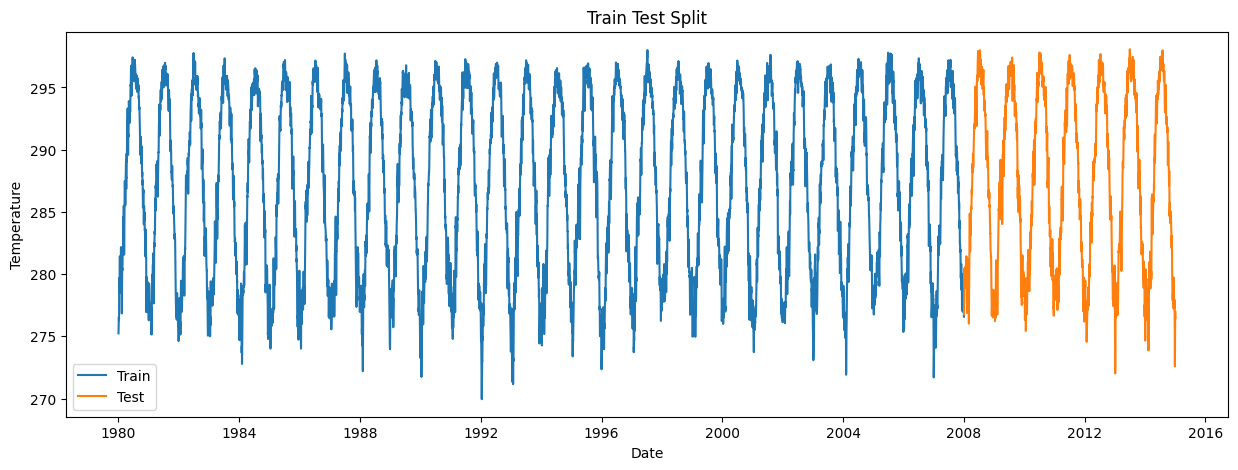

In [9]:
plt.figure(figsize=(15, 5))
plt.plot(train_data.index, train_data['Temperature'], label='Train')
plt.plot(test_data.index, test_data['Temperature'], label='Test')
plt.title('Train Test Split')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

# **Model Training**

In [10]:
# estimator = TBATS(use_trend=True, seasonal_periods=[365.25])  # considering yearly seasonality
# estimator = TBATS(use_trend=True, seasonal_periods=[365.25, 30.4])  # considering both yearly and monthly seasonality
# model = estimator.fit(train_data)

In [11]:
with open('model_y.pkl', 'rb') as file:
    model_y = pickle.load(file)
    print('Model Y loaded successfully')

with open('model_ym.pkl', 'rb') as file:
    model_ym = pickle.load(file)
    print('Model YM loaded successfully')

Model Y loaded successfully
Model YM loaded successfully


In [12]:
n_periods_test = len(test_data)
forecast_modelY = model_y.forecast(steps=n_periods_test)
forecast_modelYM = model_ym.forecast(steps=n_periods_test)

## **Accuracy**

In [13]:
mse = mean_squared_error(test_data['Temperature'], forecast_modelY)
mae = mean_absolute_error(test_data['Temperature'], forecast_modelY)
rmse = np.sqrt(mse)

mse1 = mean_squared_error(test_data['Temperature'], forecast_modelYM)
mae1 = mean_absolute_error(test_data['Temperature'], forecast_modelYM)
rmse1 = np.sqrt(mse)

print(f'Model Y')
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')
print()
print(f'Model YM')
print(f'Mean Squared Error: {mse1}')
print(f'Mean Absolute Error: {mae1}')
print(f'Root Mean Squared Error: {rmse1}')

Model Y
Mean Squared Error: 1.8585271144389754
Mean Absolute Error: 1.0448647310504986
Root Mean Squared Error: 1.363278076710315

Model YM
Mean Squared Error: 1.8529091793373955
Mean Absolute Error: 1.043799544010743
Root Mean Squared Error: 1.363278076710315


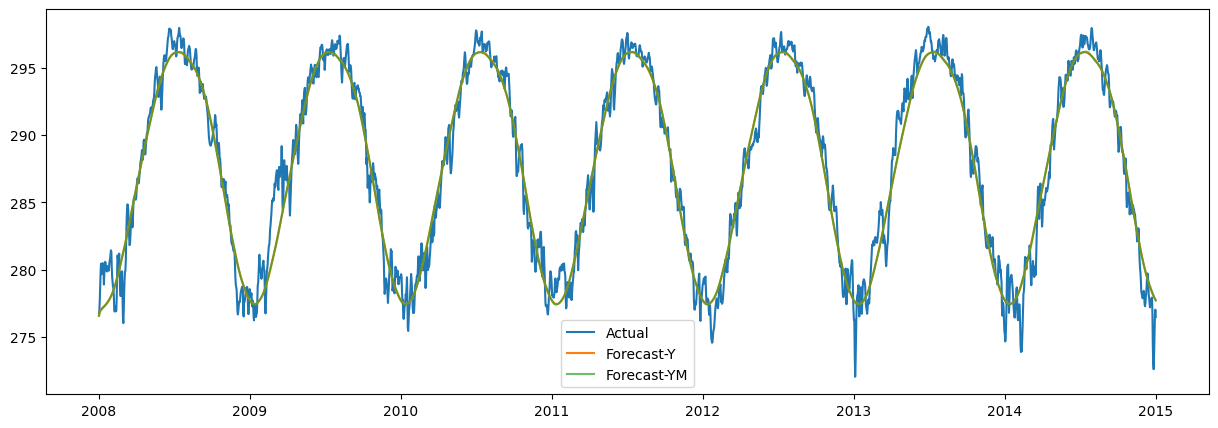

In [14]:
plt.figure(figsize=(15, 5))
plt.plot(test_data.index, test_data['Temperature'], label='Actual')
plt.plot(test_data.index, forecast_modelY, label='Forecast-Y')
plt.plot(test_data.index, forecast_modelYM, label='Forecast-YM', alpha=0.7)
plt.legend()
plt.show()

## **Saving Model**

In [15]:
# with open('tbats_model2.pkl', 'wb') as file:
#     pickle.dump(model, file)
#     print('Model saved successfully')

# **Forecasting**

## **Next 5 Years**

In [16]:
n_steps = len(test_data) + (365.25*5)
forecast_modely = model_y.forecast(steps=n_steps)
forecast_modelym = model_ym.forecast(steps=n_steps)

In [17]:
start_date = train_data.index[-1]
date_range = pd.date_range(start=start_date, periods=n_steps + 1, freq='D')[1:]

forecast_df = pd.DataFrame({'Date': date_range, 'Forecast-Y': forecast_modely , 'Forecast-YM': forecast_modelym})
forecast_df.set_index('Date', inplace=True)

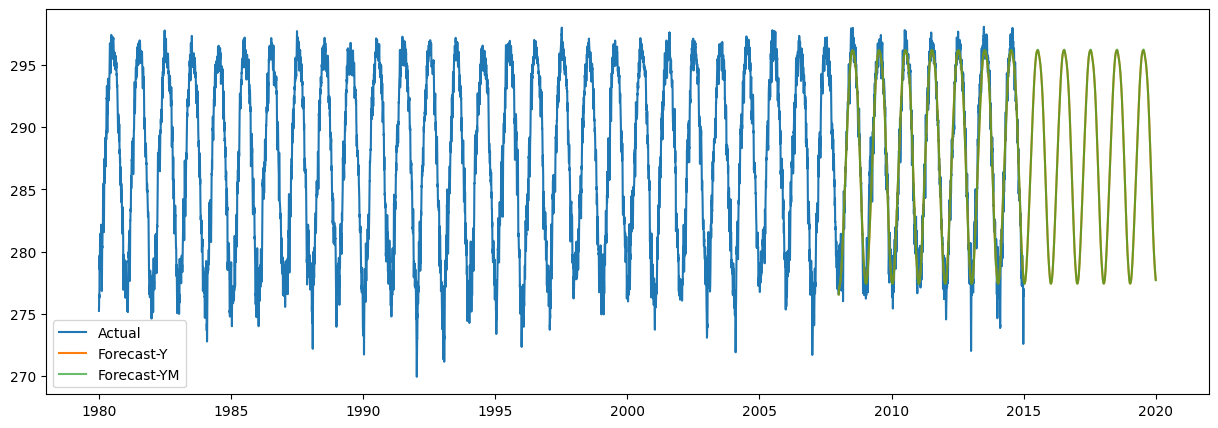

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Temperature'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast-Y'], label='Forecast-Y')
plt.plot(forecast_df.index, forecast_df['Forecast-YM'], label='Forecast-YM', alpha=0.7)
plt.legend()
plt.show()

## **Next 15 Years**

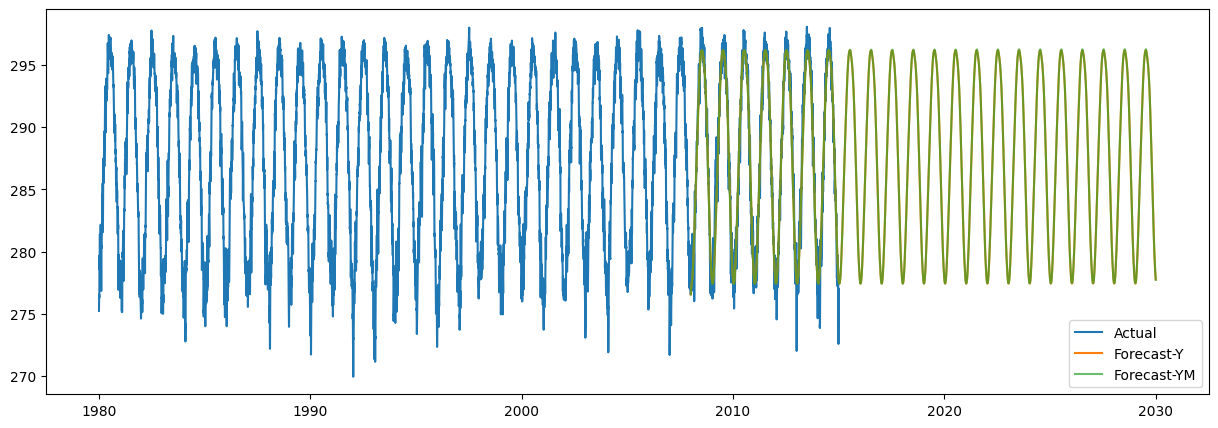

In [19]:
n_steps = len(test_data) + (365.25*15)
forecast_modely = model_y.forecast(steps=n_steps)
forecast_modelym = model_ym.forecast(steps=n_steps)

start_date = train_data.index[-1]
date_range = pd.date_range(start=start_date, periods=n_steps + 1, freq='D')[1:]

forecast_df = pd.DataFrame({'Date': date_range, 'Forecast-Y': forecast_modely , 'Forecast-YM': forecast_modelym})
forecast_df.set_index('Date', inplace=True)

plt.figure(figsize=(15, 5))
plt.plot(df.index, df['Temperature'], label='Actual')
plt.plot(forecast_df.index, forecast_df['Forecast-Y'], label='Forecast-Y')
plt.plot(forecast_df.index, forecast_df['Forecast-YM'], label='Forecast-YM', alpha=0.7)
plt.legend()
plt.show()

## **Analyzing Trends over the next 15 years**

In [20]:
# Calculate yearly averages
forecast_df['Year'] = forecast_df.index.year
yearly_avg = forecast_df.groupby('Year').mean()

# Calculate monthly averages
forecast_df['Month'] = forecast_df.index.to_period('M')
monthly_avg = forecast_df.groupby('Month').mean()
monthly_avg.index = monthly_avg.index.to_timestamp()

In [21]:
def calculate_trend(data, column_name):
    X = np.array(data.index).reshape(-1, 1)  # Reshape for sklearn
    y = data[column_name].values
    model = LinearRegression().fit(X, y)
    trend = model.coef_[0]
    return trend, model

In [22]:
yearly_trend_y, model_yearly_y = calculate_trend(yearly_avg, 'Forecast-Y')
yearly_trend_ym, model_yearly_ym = calculate_trend(yearly_avg, 'Forecast-YM')

print(f'Yearly trend for Model Y: {yearly_trend_y} per year')
print(f'Yearly trend for Model YM: {yearly_trend_ym} per year')

monthly_trend_y, model_monthly_y = calculate_trend(monthly_avg, 'Forecast-Y')
monthly_trend_ym, model_monthly_ym = calculate_trend(monthly_avg, 'Forecast-YM')

print(f'Monthly trend for Model Y: {monthly_trend_y} per month')
print(f'Monthly trend for Model YM: {monthly_trend_ym} per month')

Yearly trend for Model Y: 2.5819004689262502e-05 per year
Yearly trend for Model YM: 1.254191159405236e-05 per year
Monthly trend for Model Y: 3.118988263666786e-19 per month
Monthly trend for Model YM: 3.1189955709694936e-19 per month


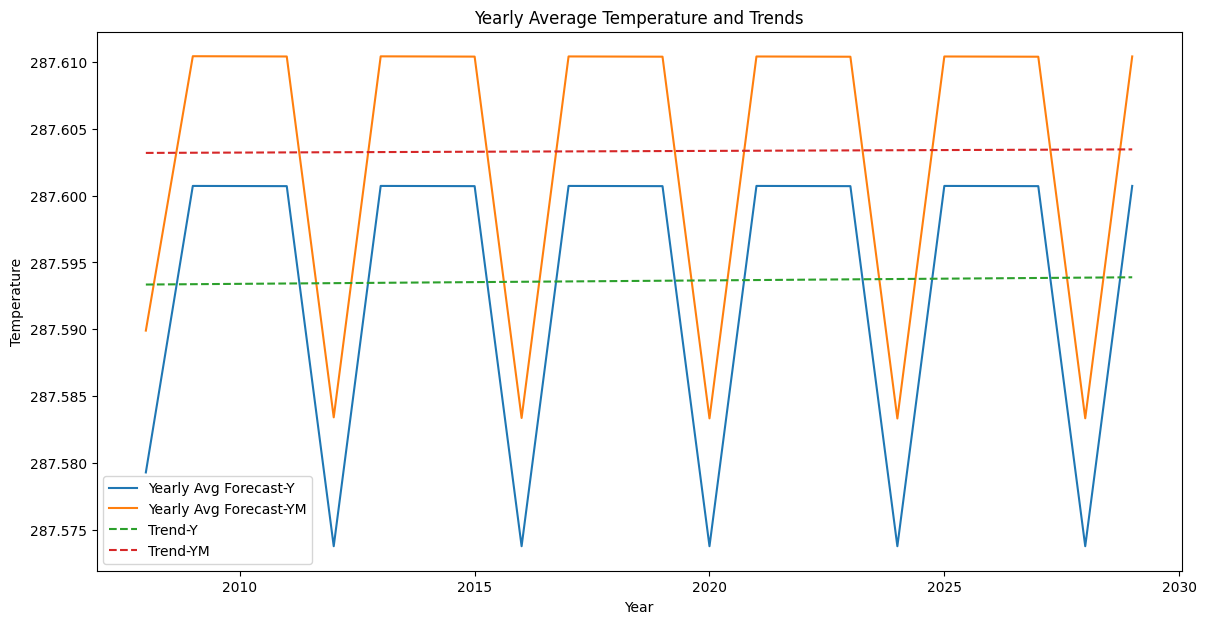

In [23]:
# yearly trends
plt.figure(figsize=(14, 7))
plt.plot(yearly_avg.index, yearly_avg['Forecast-Y'], label='Yearly Avg Forecast-Y')
plt.plot(yearly_avg.index, yearly_avg['Forecast-YM'], label='Yearly Avg Forecast-YM')
plt.plot(yearly_avg.index, model_yearly_y.predict(np.array(yearly_avg.index).reshape(-1, 1)), label='Trend-Y', linestyle='--')
plt.plot(yearly_avg.index, model_yearly_ym.predict(np.array(yearly_avg.index).reshape(-1, 1)), label='Trend-YM', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.title('Yearly Average Temperature and Trends')
plt.show()

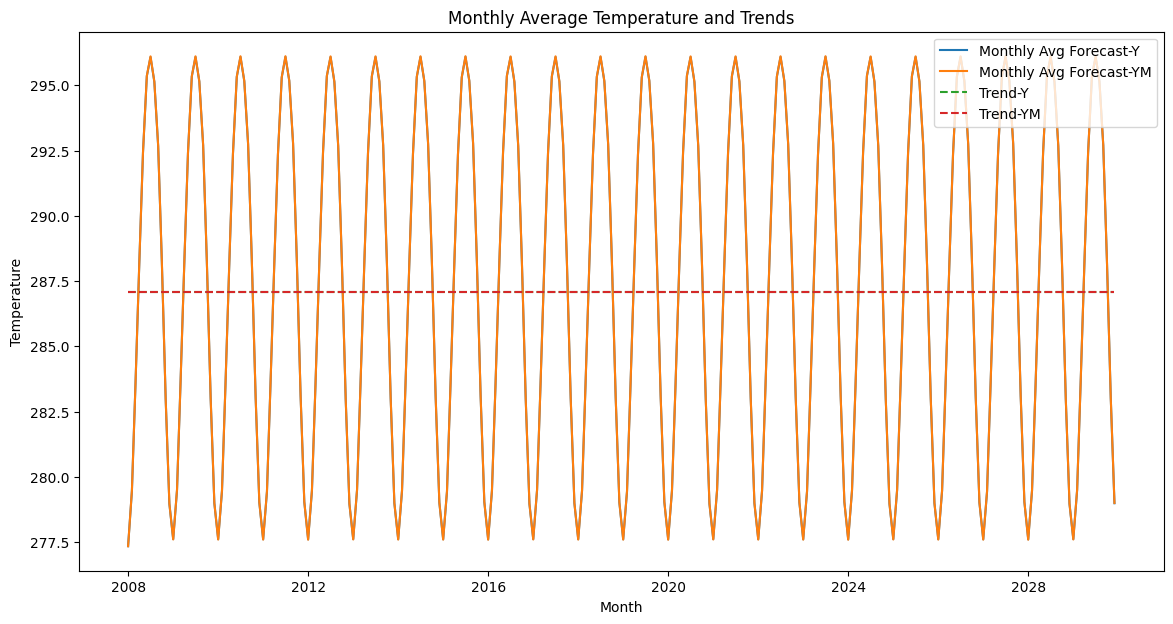

In [24]:
# monthly trends
plt.figure(figsize=(14, 7))
plt.plot(monthly_avg.index, monthly_avg['Forecast-Y'], label='Monthly Avg Forecast-Y')
plt.plot(monthly_avg.index, monthly_avg['Forecast-YM'], label='Monthly Avg Forecast-YM')
plt.plot(monthly_avg.index, model_monthly_y.predict(np.array(monthly_avg.index.to_period('M').astype(int)).reshape(-1, 1)), label='Trend-Y', linestyle='--')
plt.plot(monthly_avg.index, model_monthly_ym.predict(np.array(monthly_avg.index.to_period('M').astype(int)).reshape(-1, 1)), label='Trend-YM', linestyle='--')
plt.xlabel('Month')
plt.ylabel('Temperature')
plt.legend()
plt.title('Monthly Average Temperature and Trends')
plt.show()

### ***Analysis***

**Yearly Trend Interpretation:**

The positive values indicate a slight increase in temperature per year.

1. For Model Y, the temperature is increasing by approximately 0.0000258 units per year.
2. For Model YM, the temperature is increasing by approximately 0.0000125 units per year.

**Monthly Trend Interpretation:**

The values for monthly trends are extremely close to zero (~3.12e-19), which implies no significant change in temperature per month. These values are so small that they are practically negligible.